## <div align=center> Round Table Seating Arrangement </div>
<div align=center>Using Metahuerstic Algorithms</div>
<hr>

#### <b>Abstract</b>
In this report, the Round Table Seating arrangemnet is approached diffrently formulated as a search problem. The approchaes are Genetic Algorithm, Simulated Annealing, and Hill Climbing. Then a comparison is made between them. Throughout this report, the theory, implemnattions, discussion and conclusion are presented. It is required that rach person should be seated next to their neighbors on the left and right to facilitate conversation. It also should form a closed loop, as it is a round table.

<hr>

#### <b>Table of Contents</b>
- <b>Introduction</b>
- <b>Objectives</b>
- <b>Theory</b>
- <b>Software Versions</b>
- <b>Algorithms Implementations</b>
- <b>Discussion</b>
- <b>Conclusion</b>

#### <b>List of Figures</b>
- Figure 1: Given Dislike Matrix
- Figure 2: Graph Visualization
- Figure 3: Round Table Seating Arrangement for Genetic
- Figure 4: Round Table Seating Arrangement for Simulated Annealing
- Figure 5: Round Table Seating Arrangement for Hill climbing
- Figure 6: Optimal Round Table Seating Arrangement

#### <b>List of Tables</b>
- Table 0: Metaheursitc Vs. Heuristic
- Table 1: Software Tools and versions
- Table 2: Implemenataions comparisons and results.

<hr>

#### <b>Introduction</b>

In this notebook a heuristic table representing the dislike percentages between pairs of individuals, indicating the level of conflict or discomfort each person feels towards others is provided. The goal is to seat the individuals around a round table in the most suitable arrangement to minimize conflict while ensuring that each person can talk to their neighbors on the left and right. The heuristic table provides dislike percentages between pairs of individuals, with higher percentages indicating greater dislike or conflict. For example, a dislike percentage of 20% between Person A and Person B indicates a low level of conflict, while a dislike percentage of 80% indicates a high level of conflict.

 The follwing figure shows the matrix:

<div align='center'>
<img src="https://github.com/sondosaabed/Introducing-Generative-AI-with-AWS/assets/65151701/79c867bc-5297-4e69-99b6-a2041c919783" alt="Dislike matrix">

<b>Figure 1: </b>Given Dislike Matrix
</div>

#### <b>Objectives</b>
- To implemnet Genetic algorithm
- To implemet Simulated Annealing algorithm
- To implement Hill Climbing algorithm
- To determine which algorithm can find the best seating arrangement that minimizes conflict based on the provided heuristic table and the Non-Linear Dislike Cost function.

#### <b>Theory</b>

##### <b>Metahuerstic Vs. Heuristic</b>
Metahuerstic and Heuristic are both approaches in computer science that are non-exact stratgies. The Non-exact algorithms explore the problem in an intelligent way, thus finding good results in a feasible time with fewer resources.

A **heuristic** is a strategy that uses information about the problem being solved to find promising solutions. Similar to heuristics, **metaheuristics** aim to find promising results for a problem. However, the algorithm used for a metaheuristic is generic and can deal with different problems. *Problem-independent design*. [2]

<div align="center">

**Table 0:** Metahuerstic Vs. Heuristic table [2]

<img src="https://github.com/keras-team/keras/assets/65151701/1d28944d-ba81-4ca0-952c-f1d705668732" height="300">
</div>

##### <b>Genetic Algorthsm (GA)</b>

GA is inspired by the principles of natural selection and genetics. It starts by randomly generating an initial population of solutions, and then evolves the population byapplying operators such as selection, crossover, and mutation. These operators simulate the processof natural selection, where individuals with higher fitness are more likely to reproduce and pass ontheir traits to the next generation. GA has been widely used in optimization problems that involvefinding the best combination of parameters or feature. [1]

##### <b>Simulated Annealing (SA)</b>
SA is a stochastic optimization algorithm that is inspired by the process of annealing in metallurgy. It starts by randomly generating an initial solution, and thengradually reduces the temperature of the system. As the temperature decreases, the algorithmbecomes more likely to accept worse solutions in order to escape local optima. SA has been widelyused in optimization problems that involve finding the best configuration of parameters in complexmodels or simulations. [1]

##### <b>Hill Climbing (HC)</b>
HC is a simple optimization algorithm used in Artificial Intelligence (AI) to find the best possible solution for a given problem. It belongs to the family of local search algorithms and is often used in optimization problems where the goal is to find the best solution from a set of possible solutions. [3]

#### <b>Tools and Versions</b>

The below table shows the tools and versions used to solve this problem.

<b>Table 1:</b> Software Tools and versions

<div align="center">


|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Visual Studio Code |Updated|
|networkx|3.0.0|
|heapq|last update|

</div>

<b>Neccessary Imports</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#### <b>Data Structure</b>

<b>The follownig dislike matrix was given:</b>

In [2]:
dislike_matrix = {
    'Khalid': {'Khalid': 0.0, 'Ibrahim': 0.45, 'Fuad': 0.78, 'Hakam': 0.81, 'Samir': 0.26, 'Kamal': 0.75, 'Hani': 0.92, 'Ayman': 0.64, 'Salem': 0.99, 'Ahmed': 0.43},
    'Ibrahim': {'Khalid': 0.45, 'Ibrahim': 0.0, 'Fuad': 0.81, 'Hakam': 0.87, 'Samir': 0.37, 'Kamal': 0.42, 'Hani': 0.53, 'Ayman': 0.88, 'Salem': 0.62, 'Ahmed': 0.76},
    'Fuad': {'Khalid': 0.78, 'Ibrahim': 0.81, 'Fuad': 0.0, 'Hakam': 0.92, 'Samir': 0.97, 'Kamal': 0.53, 'Hani': 0.99, 'Ayman': 0.90, 'Salem': 0.17, 'Ahmed': 0.10},
    'Hakam': {'Khalid': 0.81, 'Ibrahim': 0.87, 'Fuad': 0.92, 'Hakam': 0.0, 'Samir': 0.63, 'Kamal': 0.88, 'Hani': 0.78, 'Ayman': 0.51, 'Salem': 0.55, 'Ahmed': 0.33},
    'Samir': {'Khalid': 0.26, 'Ibrahim': 0.37, 'Fuad': 0.97, 'Hakam': 0.63, 'Samir': 0.0, 'Kamal': 0.43, 'Hani': 0.86, 'Ayman': 0.96, 'Salem': 0.20, 'Ahmed': 0.48},
    'Kamal': {'Khalid': 0.75, 'Ibrahim': 0.42, 'Fuad': 0.53, 'Hakam': 0.88, 'Samir': 0.43, 'Kamal': 0.0, 'Hani': 0.91, 'Ayman': 0.63, 'Salem': 0.76, 'Ahmed': 0.82},
    'Hani': {'Khalid': 0.92, 'Ibrahim': 0.53, 'Fuad': 0.99, 'Hakam': 0.78, 'Samir': 0.86, 'Kamal': 0.91, 'Hani': 0.0, 'Ayman': 0.70, 'Salem': 0.11, 'Ahmed': 0.30},
    'Ayman': {'Khalid': 0.64, 'Ibrahim': 0.88, 'Fuad': 0.90, 'Hakam': 0.51, 'Samir': 0.96, 'Kamal': 0.63, 'Hani': 0.70, 'Ayman': 0.0, 'Salem': 0.90, 'Ahmed': 0.55},
    'Salem': {'Khalid': 0.99, 'Ibrahim': 0.62, 'Fuad': 0.17, 'Hakam': 0.55, 'Samir': 0.20, 'Kamal': 0.76, 'Hani': 0.11, 'Ayman': 0.90, 'Salem': 0.0, 'Ahmed': 0.68},
    'Ahmed': {'Khalid': 0.43, 'Ibrahim': 0.76, 'Fuad': 0.10, 'Hakam': 0.33, 'Samir': 0.48, 'Kamal': 0.82, 'Hani': 0.30, 'Ayman': 0.55, 'Salem': 0.68, 'Ahmed': 0.0},
}

<b>Using pandas dataframe</b>

In [3]:
df_dislike = pd.DataFrame.from_dict(dislike_matrix, orient='index')
df_dislike = df_dislike*100
df_dislike.astype(int)

,Khalid,Ibrahim,Fuad,Hakam,Samir,Kamal,Hani,Ayman,Salem,Ahmed
Khalid,0,45,78,81,26,75,92,64,99,43
Ibrahim,45,0,81,87,37,42,53,88,62,76
Fuad,78,81,0,92,97,53,99,90,17,10
Hakam,81,87,92,0,63,88,78,51,55,33
Samir,26,37,97,63,0,43,86,96,20,48
Kamal,75,42,53,88,43,0,91,63,76,82
Hani,92,53,99,78,86,91,0,70,11,30
Ayman,64,88,90,51,96,63,70,0,90,55
Salem,99,62,17,55,20,76,11,90,0,68
Ahmed,43,76,10,33,48,82,30,55,68,0


<b>Initilaize the edges and the nodes from the datframe</b>

Using a Graph datastructure

In [4]:
graph = nx.Graph()
graph.add_nodes_from(df_dislike.index)

# From the dataframe I add the weights to the graph
for i in range(len(df_dislike)):
    for j in range(i + 1, len(df_dislike)):
        weight = df_dislike.iloc[i, j]
        if weight != 0:
            graph.add_edge(df_dislike.index[i], df_dislike.index[j], weight=weight)

# Here I make a loopback to the node itself with weight 0
for node in graph.nodes():
    graph.add_edge(node, node, weight=0)

print(graph)

Graph with 10 nodes and 55 edges


<b>Weighted Grpah Visualization</b>

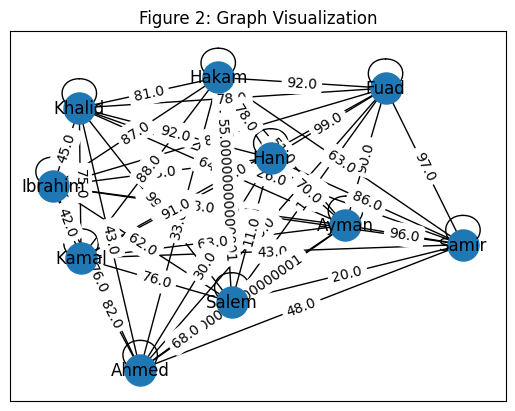

In [5]:
pos = nx.spring_layout(graph)  
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_nodes(graph, pos, node_size=500)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
nx.draw_networkx_labels(graph, pos)
plt.title('Figure 2: Graph Visualization')
plt.show()

This is a complete graph which means that there exists a path between any two vertices in the graph

#### <b>Task 2: Cost Function</b>

The cost function used is a Non-Linear Dislike Cost function. Define a non-linear function f(x) that maps dislike percentages to costs. e.g., f(x) = x^2 would make high dislike percentages have a quadratically higher cost.

`f(n) = sum(dislike_percentages_between_neighbors) + sum(f(dislike_percentages_between_neighbors))`

The aim of this function is to penalize highly disliked pairs more severely than just a constant of a linear mapping.

In [6]:
def calculate_cost(path, graph):
    """
    The cost function, this will compute the total cost of the path in a graph.
    The total cost calculation should consider both directions between adjacent pairs to avoid asymmetry. 
    Args:
        path (list): List of nodes or a specific seating arrangements.
        graph (nx.Graph): graph obj. that has the nodes and the edges.
    Return:
        Represents the total dislike in the whole path 
    """
    total_cost = 0.0
    if len(path) == 0:
        return None
    for i in range(len(path)):
        person1 = path[i]
        person2 = path[(i + 1) % len(path)]  
        if graph.has_edge(person1, person2):
            dislike_percentage = graph[person1][person2]['weight']
            total_cost += dislike_percentage**2 # non-linearity
    return total_cost

#### <b>Table solution visualization</b>

- This function is created to visulaize the round table arrangemnet

In [7]:
def visualize_round_table(arrangement, title):
    """
    Visualizes the round table arrangement using a graph plot.
    Args:
        arrangement (list): the seating arrangement in order.
    Returns:
        None 
    """
    G = nx.cycle_graph(len(arrangement))
    node_labels = {i: name for i, name in enumerate(arrangement)}
    pos = nx.circular_layout(G)
    edges = [(arrangement[i], arrangement[(i + 1) % len(arrangement)]) for i in range(len(arrangement))]
    valid_edges = [edge for edge in edges if edge[0] in G.nodes and edge[1] in G.nodes]
    
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=valid_edges, edge_color='orange', width=2)
    plt.title(title)
    plt.show()

#### <b>Algorithms Implementations</b>

<b>Genetic Algorithm algorithm Implementation</b>

In [8]:
def genetic_algorithm(population_size=100, num_generations=1000, mutation_rate=0.1) :
    """
    An implemnetation of Genetic algorithm
    Args:
        graph (nx.Graph): graph of the data
        start_node (str): the start node
    -	Population initialization: Randomly generate the initial population. 
    -	Selection: Use elitism to select the top 60% of the population based on their cost. 
    -	Crossover: Combine pairs of parents to create offspring. 
    -	Mutation: Randomly swap positions of two people in an arrangement with a given mutation rate. 
    Returns:
        optimal_arrangement (list): Optimal seating arrangement (path) minimizing conflict.
        min_cost (float): total cost for solution
    """
    min_cost = float('inf')
    optimal_arrangement = None
    individuals = list(graph.nodes)
    if len(individuals) == 0:
        return None
    
    return optimal_arrangement, min_cost

- Call function on the data and check the time, performace:

In [ ]:
optimal_arrangement_genetic, min_cost_genetic = genetic_algorithm(graph)
if optimal_arrangement_genetic == None:
    print("Genetic Algorithm was not able to find a path")
else: 
    print("The best round table arrangmnet using Genetic Algorithm is: ",optimal_arrangement_genetic)
    print("Genetic min total cost", min_cost_genetic)
    print("Average dislike percenatge per edge: ", np.sqrt(min_cost_genetic/55))

In [ ]:
visualize_round_table(optimal_arrangement_genetic, 'Figure 3: Round Table Seating Arrangement for Genetic')

<b>Simulated Annealing  algorithm Implementation</b>

In [9]:
def  simulated_annealing(initial_temperature=1000,cooling_rate=0.99, num_iterations=10000):
    """
    An implemnetation of greedy search algorithm that finds the round arranemnet with minumum hate 
    Args:
        graph (nx.Grpah): graph object 
    -	Initial solution: Start with a random arrangement. 
    -	Temperature: Decrease the temperature gradually according to the cooling rate. 
    -	Acceptance probability: Accept worse solutions with a probability depending on the current temperature to escape local minima. 
    Returns:
        None if it fails or returns the path that have a solution
    """
    individuals = list(graph.nodes)
    current_node = individuals[0]
    path = [current_node]
    min_cost = float('inf')
    visited = {current_node}
    if len(individuals) == 0:
        return None
    
    if len(path) == len(individuals) and path[0] in graph.neighbors(path[-1]):
        return path, min_cost
    else:
        return None  # Fails to find arrangement

- Call function on the data and check the time, performace:

In [ ]:
optimal_arrangement_annealing, min_cost_annealing = simulated_annealing(graph)
if optimal_arrangement_annealing == None:
    print("Simulated Annealing was not able to find a path")
else: 
    print("The best round table arrangmnet using Greed is: ", optimal_arrangement_annealing)
    print("Simulated Annealing min total cost", min_cost_annealing)
    print("Average dislike percenatge per edge: ", np.sqrt(min_cost_annealing/55))

In [ ]:
visualize_round_table(optimal_arrangement_annealing,'Figure 4: Round Table Seating Arrangement for Simulated Annealing')

<b>Hill Climbing algorithm Implementation</b>

In [10]:
def hill_climbing(num_restarts=100):
    """
    Implementation of A* Search algorithm to find the optimal cyclic seating arrangement
    minimizing conflict based on dislike percentages.
    
    Args:
        graph (nx.Graph): NetworkX graph representing the complete dislike relationships.
    -	Initial solution: Start with a random arrangement. 
    -	Neighbors: Generate neighbors by swapping pairs of people. 
    -	Restarts: Perform multiple random restarts to explore different parts of the solution space. 

    Returns:
        tuple or None: Tuple containing the optimal seating arrangement (path) minimizing conflict
                       and its corresponding minimum conflict cost, or None if no valid arrangement found.
    """
    individuals = list(graph.nodes)
    start_node = individuals[0]
    priority_queue = [(0, [start_node])]  
    visited = {start_node: 0}  
    if len(individuals) == 0:
        return None    
    
    return None

- Call function on the data and check the time, performace:

In [ ]:
optimal_arrangement_hill, min_cost_hill = hill_climbing()
if optimal_arrangement_hill == None:
    print("Hill climbing was not able to find a path")
else:    
    print("The best round table arrangmnet using Hill climbing is: ",optimal_arrangement_hill)
    print("Hill climbing min total cost", min_cost_hill)
    print("Average dislike percenatge per edge: ", np.sqrt(min_cost_hill/55))

In [ ]:
visualize_round_table(optimal_arrangement_hill,'Figure 5: Round Table Seating Arrangement for Hill climbing')

#### <b>Discussion, Evaluation and Results</b>

Three algorthims were implemented to minimize the dislike as a round table arrangemnet is done. The below table shows a summary of the implementations done. 

Table 2: Algorthims Comparision

|Algorithm|Path|Minium Cost|
|---------|----|-----------|
|Genetic|[]||
|Simulated Annealing|[]||
|Hill Climbing|[]||

> It is noticed that 

#### <b>Conclusion</b>
In conclusion, the objectives are met where three algorithms were implemnted to find the optimal round arrangement. The implemnations were called and evaluated mainly based on the minimum cost that they had. While 

So the final seating arrangemnet was chosen to be the one that -- obtained, which is the minumum conflict between seats. Folwoing is it's visulization:

In [ ]:
visualize_round_table(optimal_arrangement_hill, 'Figure 6: Optimal Round Table Seating Arrangement')

#### <b>Refrences</b>

- [1] (PDF) Overview of Metaheuristic Algorithms. Available from: https://www.researchgate.net/publication/370422753_Overview_of_Metaheuristic_Algorithms [accessed Jun 08 2024].
- [2] https://www.baeldung.com/cs/heuristics-vs-meta-heuristics-vs-probabilistic-algorithms
- [3] https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/